# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
import warnings

from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
warnings.filterwarnings("ignore")

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

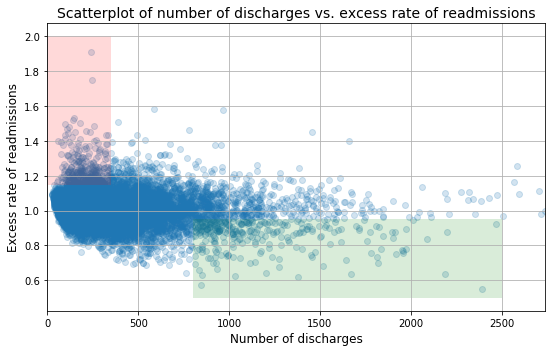

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Preliminary exploration

In [5]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [6]:
clean_hospital_read_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [7]:
clean_hospital_read_df = clean_hospital_read_df.drop('Footnote', axis=1).dropna(axis=0)

In [8]:
df = clean_hospital_read_df

### A) Do you agree with the above analysis and recommendations? Why or why not?


I disagree with analysis and recommendations above far several reasons:
<ol>
    <li>No hypothesis test or thorough statistical analysis was indicated in the preliminary analysis.</li>
    <li>No trend line was drawn in the plot provided, nor was an R-squared value given to show that there is a relationship between number of disharges and the excess readmission ratio.</li>
    <li>The policy applies to facilities with fewer that 300 discharges, but the statistics quoted only concern facilities with fewer than 100 or more than 1000 discharges.</li>
    <li>Given the wide spread of excess readmission ratios, tt is possible that the ratios of 1.023 and 0.978 do not deviate significantly from the mean.</li>
</ol>

### B) Provide support for your arguments and your own recommendations with a statistically sound analysis.
#### Null hypothesis: There is a significant correlation between hospital capacity (number of discharges) and readmission rates.


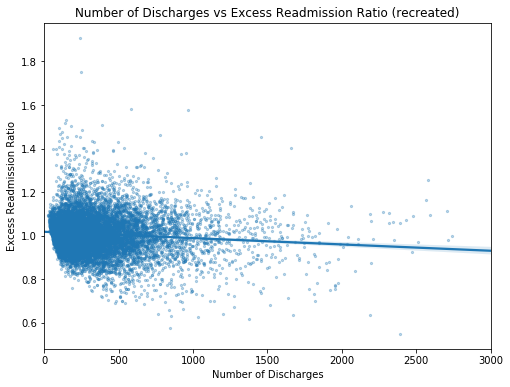

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x='Number of Discharges', y='Excess Readmission Ratio', data=df,
            scatter_kws={'alpha': 0.3, 's': 5})
ax.set_xlim([0, 3000])
ax.set_title('Number of Discharges vs Excess Readmission Ratio (recreated)')
plt.show()

Looking at a recreation of the original scatter plot (above), it is clear that readmissions are trending slightly downward. However, it also appears that the plot above was cut off at a number that was low enough to not show a significant number of data points, many of which had a high number of discharges but an excess readmission ratio higher than 1.0. This, combined with failure to draw a trendline, made the downwards trend in discharges appear steeper than actual. Looking at the plot above, it does not appear that the correlation between the data and the trendline would be great enough to use it as a basis for policy decisions of any significant scale.

In [10]:
num_rr_less_100 = len(df[df['Number of Discharges'] < 100])
ex_rr_less_100 = np.mean(df[df['Number of Discharges'] < 100]['Excess Readmission Ratio'])
ex_rr_pct_less_100 = np.sum(df[df['Number of Discharges'] < 100]['Excess Readmission Ratio'] > 1) / num_rr_less_100

num_rr_great_1000 = len(df[df['Number of Discharges'] > 1000])
ex_rr_great_1000 = np.mean(df[df['Number of Discharges'] > 1000]['Excess Readmission Ratio'])
ex_rr_pct_great_1000 = np.sum(df[df['Number of Discharges'] > 1000]['Excess Readmission Ratio'] > 1) / num_rr_great_1000

print('In hospitals/facilities with number of discharges < 100, ' +
       'mean excess readmission rate is {:0.3f}'.format(ex_rr_less_100))
print('In hospitals/facilities with number of discharges < 100, ' +
       '{:0.0f}% have an excess readmission rate greater than 1'.format(ex_rr_pct_less_100*100))

print('\nIn hospitals/facilities with number of discharges > 1000, ' +
       'mean excess readmission rate is {:0.3f}'.format(ex_rr_great_1000))
print('In hospitals/facilities with number of discharges > 1000, ' +
       '{:0.0f}% have an excess readmission rate greater than 1'.format(ex_rr_pct_great_1000*100))

print('\nThe percentage of hospitals with number of ' +
       'discharges < 100: {:0.2f}%'.format(num_rr_less_100 * 100/len(df)))
print('The percentage of hospitals with number of ' +
       'discharges > 1000: {:0.2f}%'.format(num_rr_great_1000 * 100/len(df)))
                      

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023
In hospitals/facilities with number of discharges < 100, 63% have an excess readmission rate greater than 1

In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978
In hospitals/facilities with number of discharges > 1000, 44% have an excess readmission rate greater than 1

The percentage of hospitals with number of discharges < 100: 10.33%
The percentage of hospitals with number of discharges > 1000: 4.03%


In [11]:
# Since it is impossible that a facility would have 0 discharges, drop facilities that have 0 discharges recorded
discharges = np.array(df[df['Number of Discharges'] > 0]['Number of Discharges'])
# Many read rates are 'NA', which should be dropped.
read_ratios = np.array(df[df['Number of Discharges'] > 0]['Excess Readmission Ratio'].dropna())

In [21]:
r, p = stats.pearsonr(discharges, read_ratios)
discharges_conf_int = np.percentile(discharges, [0.5,99.5])
std_dev_diff = 1-np.sqrt(1-r*r)

print('{:0.2f}% of the variance in excess readmission ratios '.format(r*r * 100) +
      'can be explained by the variance in number of discharges' +
      'with a p-value of {:0.2f}'.format(p))
print('\nThe mean number of discharges is {:0.0f}.'.format(np.mean(discharges)))
print('\nA 99% confidence interval for number of discharges '+
      'is {:0.2f} to {:0.2f}'.format(discharges_conf_int[0], discharges_conf_int[1]))

0.95% of the variance in excess readmission ratios can be explained by the variance in number of dischargeswith a p-value of 0.00

The mean number of discharges is 365.

A 99% confidence interval for number of discharges is 43.48 to 1773.52


The fact that 0.95% of the variance in excess readmission ratios can be explained by the variance in number of discharges invalidates the conclusions that are made from this relationship. **The null hypothesis that there is no correlation between hospital capacity (number of discharges) and readmission rates be rejected.** However, the relationship is simply too miniscule to support large-scale changes in policy based on it. The conclusions of the study should be considered invalid, regardless.

Besides this, using an analysis of outliers to determine policy for facilities with discharges of 300 or fewer is invalid, as 300 comes close to the mean of 325. While some of the facilities with fewer than 100 discharges were within a 95% confidence interval, all of the facilities with more than 1000 discharges were outside this interval.
While I calculate that in hospitals/facilities with number of discharges < 100, 59% (not 63%) have an excess readmission rate greater than 1, my other calculations seem to match up. It is interesting to note that 85% of all hospitals are ignored when calculating these statistics.

Another problem is that there is no data that directly measures hospital capacity - rather, this is assumed from discharge rates, and it is unknown to what degree discharge rates correlate with hospital capacity.

For all of these reasons, I do not agree with conclusions reached by the study.

#### 1) Test distributions of number of discharges and excess readmission ratios for normality.

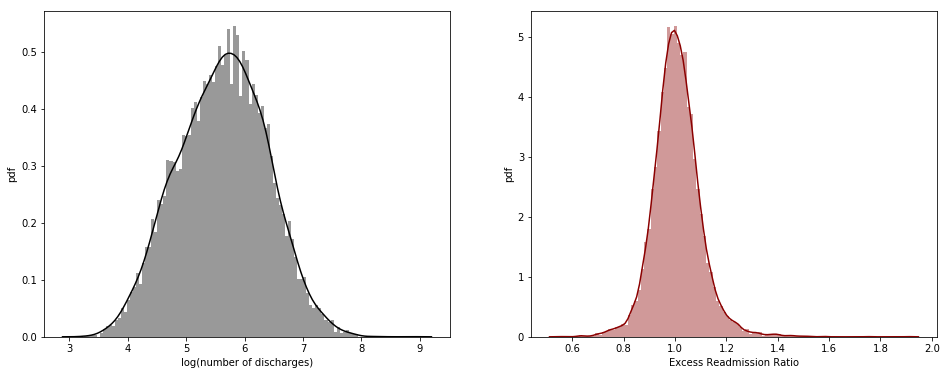

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6))
sns.distplot(np.log1p(discharges), bins=int(np.sqrt(len(discharges))), ax=ax1, color='black')
ax1.set_xlabel('log(number of discharges)')
ax1.set_ylabel('pdf')

sns.distplot(read_ratios, bins=int(np.sqrt(len(read_ratios))), ax=ax2, color='darkred')
ax2.set_xlabel('Excess Readmission Ratio')
ax2.set_ylabel('pdf')
plt.show()

In [14]:

def eval_hnull(p, alpha):
    if p >= alpha:
        print('The null hypothesis should not be rejected.') 
        print('Probability is %0.2f of making a type 1 error, which is above a significance level of %0.2f.' % (p, alpha))

    else:
        print('The null hypothesis can be rejected.') 
        print('Probability is %0.2f of making a type 1 error, which is below a significance level of %0.2f.' % (p, alpha))
    return

def normtest_sample(x, n, reps):
    """Due to the fact that normality tests always fail for large numbers of samples, this function was created 
    to take many smaller random samples and test them for normality. The p-values of each test are
    then averaged into a final p-value and returned.""" 
    p=np.empty(reps)
    for i in range(reps):
        x_s = np.random.choice(x, n)
        _, p[i] = stats.normaltest(x_s)
    return np.mean(p)

np.random.seed(8)

# set a significance threshold alpha
alpha = 0.01

# run 500 tests on 100 random samples from each distribution and test for normality
p_normal_discharges = normtest_sample(np.log1p(discharges), 100, 10000)
p_normal_read = normtest_sample(read_ratios, 100, 10000)
p_normal_random = normtest_sample(np.random.uniform(0,100,len(read_ratios)), 100, 10000)

# print results
print('For reference, evaluating a null hypothesis that a random uniform distribution is normally distributed:')
eval_hnull(p_normal_random, alpha)
print('\nEvaluating a null hypothesis that the log number of discharges is normally distributed:')
eval_hnull(p_normal_discharges, alpha)
print('\nEvaluating a null hypothesis that readmission ratios are normally distributed:')
eval_hnull(p_normal_read, alpha)




For reference, evaluating a null hypothesis that a random uniform distribution is normally distributed:
The null hypothesis can be rejected.
Probability is 0.00 of making a type 1 error, which is below a significance level of 0.01.

Evaluating a null hypothesis that the log number of discharges is normally distributed:
The null hypothesis should not be rejected.
Probability is 0.45 of making a type 1 error, which is above a significance level of 0.01.

Evaluating a null hypothesis that readmission ratios are normally distributed:
The null hypothesis should not be rejected.
Probability is 0.12 of making a type 1 error, which is above a significance level of 0.01.


Since normality test tend tend to always fail for large sample sizes, it is necessary to draw a large number of smaller bootstrap samples in order to conduct normality tests.
Performing multiple normality test on bootstrapped samples of these distributions, in combination with analyzing their pdfs, shows that they are sufficiently normal for the central limit theorem to apply.

#### 2) Determine appropriate metrics for outlying facilities based on number of discharges.
Any facilities that are outside of a 99% confidence interval of the mean number of discharges will be considered outliers.

In [34]:
low_pct, high_pct = np.percentile(discharges, [5, 95])
print('Facilities with fewer than {:0.0f} discharges '.format(low_pct) + 
      'are lower than a 99% confidence interval from the mean number of discharges.')
print('Facilities with more than {:0.0f} discharges '.format(high_pct) + 
      'are higher than a 99% confidence interval from the mean number of discharges.')

Facilities with fewer than 76 discharges are lower than a 99% confidence interval from the mean number of discharges.
Facilities with more than 931 discharges are higher than a 99% confidence interval from the mean number of discharges.


In [35]:
low_facilities = df[df['Number of Discharges'] <= low_pct]
mean_facilities = df[(df['Number of Discharges'] >= low_pct) &
                     (df['Number of Discharges'] <= high_pct)]
high_facilities = df[df['Number of Discharges'] <= high_pct]

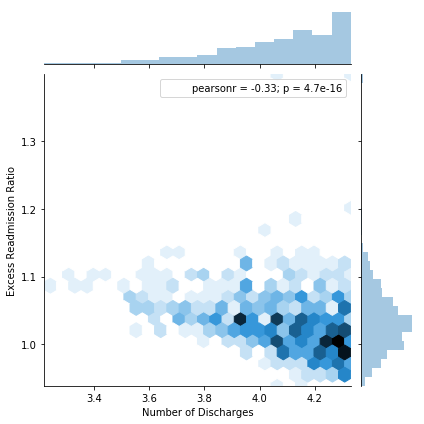

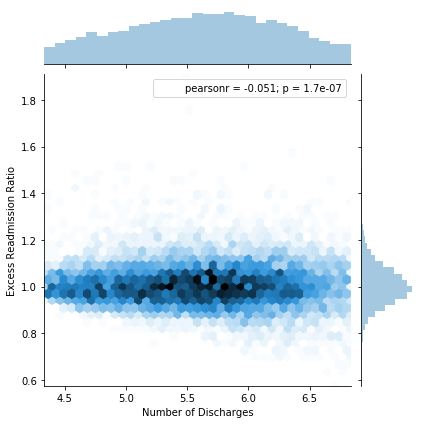

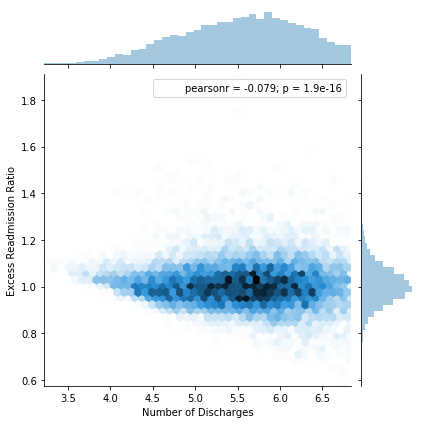

In [36]:
x_low_fac = np.log(low_facilities['Number of Discharges']),
y_low_fac = low_facilities['Excess Readmission Ratio']

x_mean_fac = np.log(mean_facilities['Number of Discharges'])
y_mean_fac = mean_facilities['Excess Readmission Ratio']

x_high_fac = np.log(high_facilities['Number of Discharges'])
y_high_fac = high_facilities['Excess Readmission Ratio']

# f, axes = plt.subplots(1, 3, figsize=(20, 12), sharex=False, sharey=True)
sns.jointplot(x_low_fac, y_low_fac, kind="hex")

sns.jointplot(x_mean_fac, y_mean_fac, kind="hex")

sns.jointplot(x_high_fac, y_high_fac, kind="hex");

Interpreting the above, the mean excess readmission ratio is 1.0 for facilities within a 95% confidence interval of the mean number of discharges.    
The mean excess readmission ratio is 1.0 for facilities above a 95% confidence interval of the mean number of discharges.  
**The mean excess readmission ratio is higher than 1.0 for facilities below a 95% confidence interval of the mean number of discharges.**

My recommendation based on the above would be that facilities with 76 discharges or fewer be analyzed more thoroughly to determine what factors result in a higher rate of readmissions at these facilities. Action points, whether changes in funding, equipment, or location, should be determined from there.